# 目標：將三種鬼分群並進行預測


# 匯入資料集

In [305]:
import pandas as pd
df_train = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [306]:
df_train

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
...,...,...,...,...,...,...,...
366,886,0.458132,0.391760,0.660590,0.635689,blue,Goblin
367,889,0.331936,0.564836,0.539216,0.551471,green,Ghost
368,890,0.481640,0.501147,0.496446,0.544003,clear,Ghoul
369,896,0.294943,0.771286,0.583503,0.300618,clear,Ghost


# Data Description
### id - id of the creature
### bone_length - average length of bone in the creature, normalized between 0 and 1
### rotting_flesh - percentage of rotting flesh in the creature
### hair_length - average hair length, normalized between 0 and 1
### has_soul - percentage of soul in the creature
### color - dominant color of the creature: 'white','black','clear','blue','green','blood'
### type - target variable: 'Ghost', 'Goblin', and 'Ghoul'

# 描述資料
### bone_length（生物骨頭平均長度）:Mean=0.4341,Max=0.817,Min:0.061

### rotting_flesh(生物腐爛肉的百分比 ) : Mean=0.506848 Max:0.932466 Min:0.095687

### hair_length(平均頭髮長度): Mean=0.529114 Max:1.00000 Min:0.134600

### has soul（生物靈魂百分比):Mean=0.471392  Max:0.935721  Min:0.009402

### color (生物的主要顏色): 'white','black','clear','blue','green','blood'

### type (目標變數) ：'Ghost', 'Goblin', and 'Ghoul'

In [311]:
df_train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [307]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [308]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             529 non-null    int64  
 1   bone_length    529 non-null    float64
 2   rotting_flesh  529 non-null    float64
 3   hair_length    529 non-null    float64
 4   has_soul       529 non-null    float64
 5   color          529 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


# 有無空值

In [24]:
df_train.isnull()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
366,False,False,False,False,False,False,False
367,False,False,False,False,False,False,False
368,False,False,False,False,False,False,False
369,False,False,False,False,False,False,False


# 第一部分視覺化：各欄位敘述統計箱型圖

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


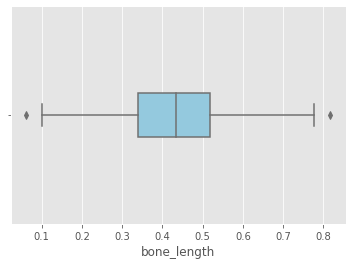

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

sns_plot1=sns.boxplot(x=df['bone_length'], orient = "v", color = "skyblue", width=0.2)
plt.savefig('bone_length.png')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


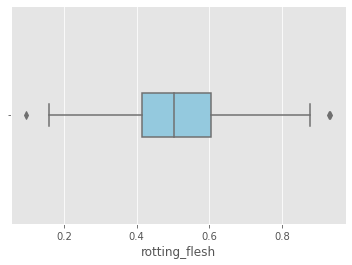

In [320]:
sns.boxplot(x =df['rotting_flesh'], orient = "v", color = "skyblue", width=0.2)
plt.savefig('rotting_flesh.png')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


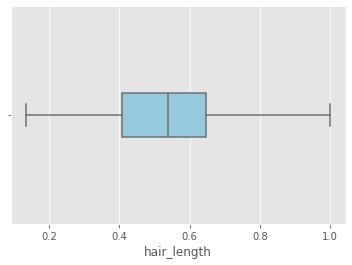

In [321]:
sns.boxplot(x =df['hair_length'], orient = "v", color = "skyblue", width=0.2)
plt.savefig('hair_length.png')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


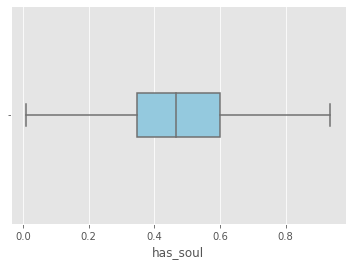

In [322]:
sns.boxplot(x =df['has_soul'], orient = "v", color = "skyblue", width=0.2)
plt.savefig('has_soul.png')

In [52]:
df['color'].describe()

count       371
unique        6
top       white
freq        137
Name: color, dtype: object

# 第二部分視覺化：不同顏色在各欄位的數值分佈

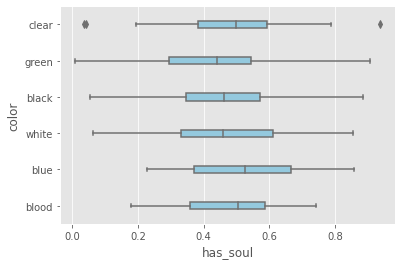

In [323]:
sns.boxplot(x =df['has_soul'], y=df['color'],orient = "h", color = "skyblue", width=0.2)
plt.savefig('has_soul_color.png')

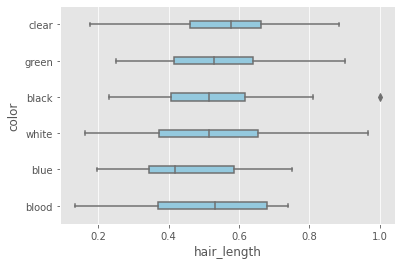

In [324]:
sns.boxplot(x =df['hair_length'], y=df['color'],orient = "h", color = "skyblue", width=0.2)
plt.savefig('hair_length_color.png')

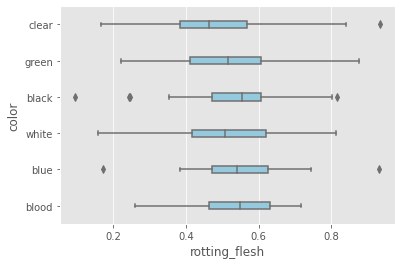

In [325]:
sns.boxplot(x =df['rotting_flesh'], y=df['color'],orient = "h", color = "skyblue", width=0.2)
plt.savefig('rotting_flesh_color.png')

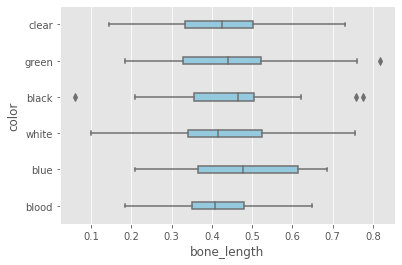

In [326]:
sns.boxplot(x =df['bone_length'], y=df['color'],orient = "h", color = "skyblue", width=0.2)
plt.savefig('bone_length_color.png')

# 第三部分視覺化：各欄位的相關關係

# 1-bone_length_rotting_flesh

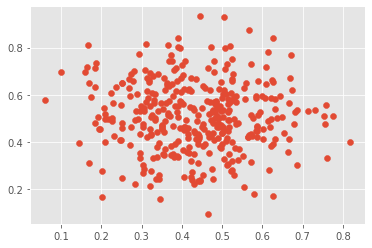

<Figure size 432x288 with 0 Axes>

In [328]:
# bone_length/rotting_flesh 貌似無關？
import matplotlib.pyplot as plt
plt.scatter(df['bone_length'],df['rotting_flesh'])
plt.show()
plt.savefig('bone_length_rotting_flesh.png')

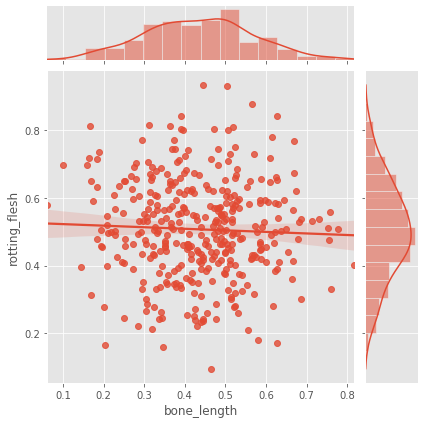

In [346]:
plot=sns.jointplot(data=df,x='bone_length', y='rotting_flesh',kind='reg')
plt.savefig('bone_length_rotting_flesh.png')

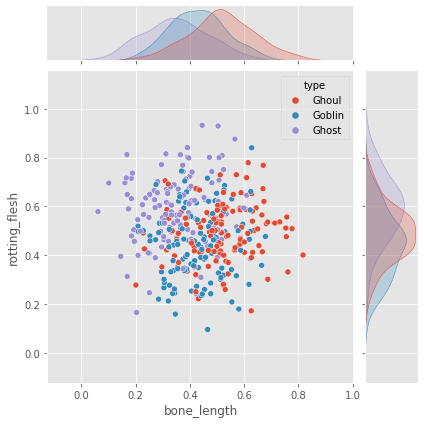

In [345]:
plot=sns.jointplot(data=df,x='bone_length', y='rotting_flesh',hue='type')
#plot.

# 2 - bone_length_hair_length

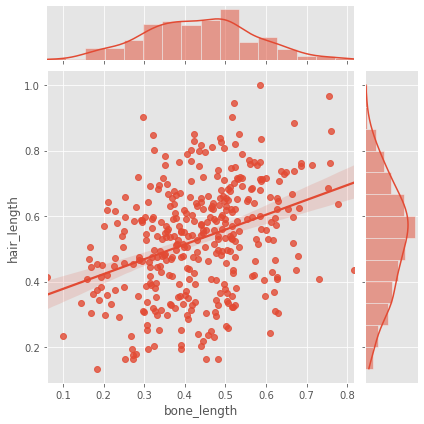

In [341]:
plot=sns.jointplot(data=df,x='bone_length', y='hair_length',kind='reg')
plt.savefig('bone_length_hair_length.png')

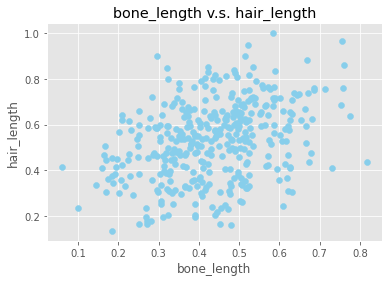

In [334]:
#貌似有正相關
import matplotlib.pyplot as plt
plt.scatter(df['bone_length'],df['hair_length'],color='skyblue')
plt.xlabel('bone_length')
plt.ylabel('hair_length')
plt.title('bone_length v.s. hair_length')
plt.show()

# 3- bone_length_has_soul

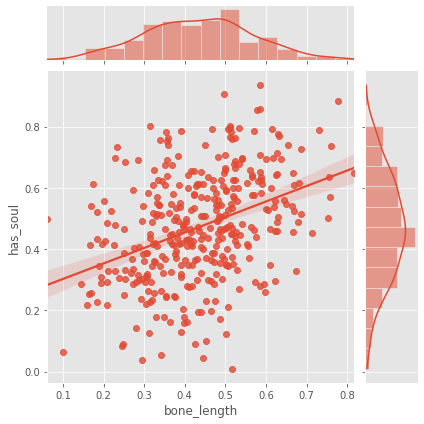

In [347]:
plot=sns.jointplot(data=df,x='bone_length', y='has_soul',kind='reg')
plt.savefig('bone_length_has_soul.png')

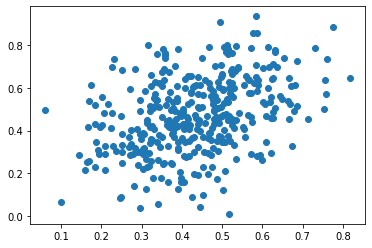

In [10]:
#
import matplotlib.pyplot as plt
plt.scatter(df['bone_length'],df['has_soul'])
plt.show()

# 4-bone_length_has_soul

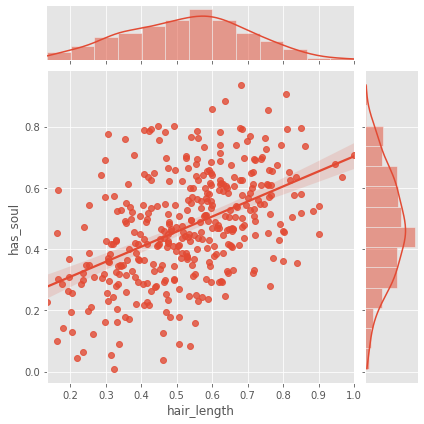

In [349]:
plot=sns.jointplot(data=df,x='hair_length', y='has_soul',kind='reg')
plt.savefig('hair_length_has_soul.png')

# rotting_flesh_has_soul

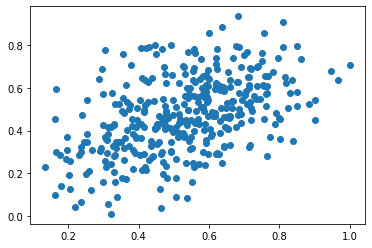

In [12]:
#
import matplotlib.pyplot as plt
plt.scatter(df['rotting_flesh'],df['has_soul'])
plt.show()

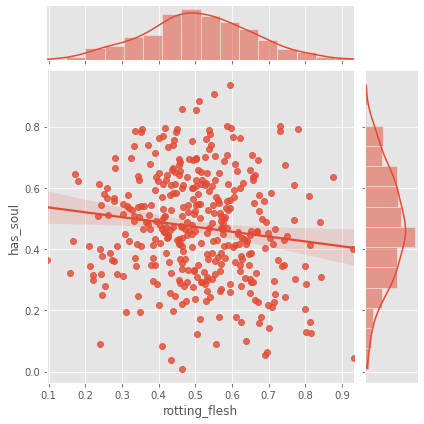

In [350]:
plot=sns.jointplot(data=df,x='rotting_flesh', y='has_soul',kind='reg')
plt.savefig('rotting_flesh_has_soul.png')

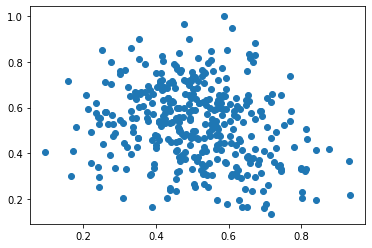

In [13]:
#
import matplotlib.pyplot as plt
plt.scatter(df['rotting_flesh'],df['hair_length'])
plt.show()

# hair_length_has_soul	

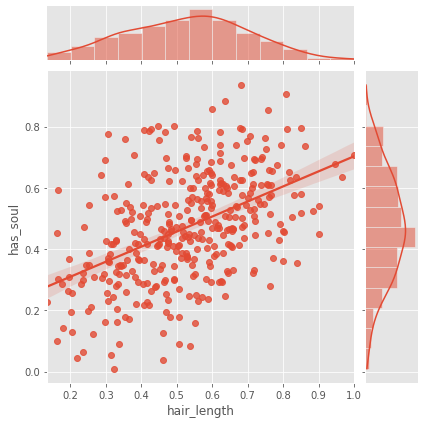

In [351]:
plot=sns.jointplot(data=df,x='hair_length', y='has_soul',kind='reg')
plt.savefig('hair_length_has_soul.png')

# rotting_flesh vs hair_length

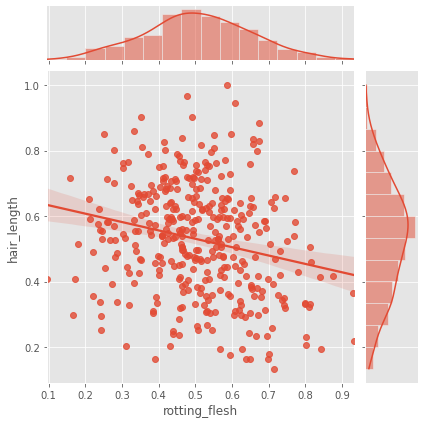

In [354]:
plot=sns.jointplot(data=df,x='rotting_flesh', y='hair_length',kind='reg')
plt.savefig('rotting_flesh_hair_length.png')

In [7]:
df

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
...,...,...,...,...,...,...,...
366,886,0.458132,0.391760,0.660590,0.635689,blue,Goblin
367,889,0.331936,0.564836,0.539216,0.551471,green,Ghost
368,890,0.481640,0.501147,0.496446,0.544003,clear,Ghoul
369,896,0.294943,0.771286,0.583503,0.300618,clear,Ghost


# 第四部分視覺化：color不同的資料在其他欄位間的相關關係

# bone_length_rotting_flesh vs color

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


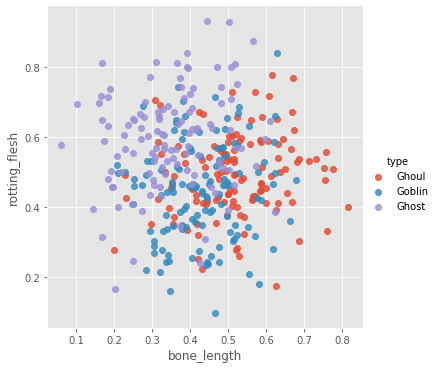

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.lmplot('bone_length','rotting_flesh',data=df,fit_reg=False,hue='type')
plt.savefig('bone_length_rotting_flesh.png')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


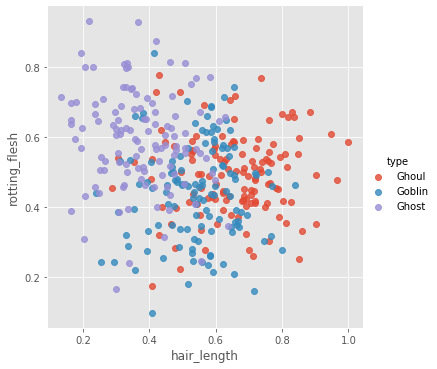

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.lmplot('hair_length','rotting_flesh',data=df,fit_reg=False,hue='type')
plt.savefig('hair_length_rotting_flesh.png')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


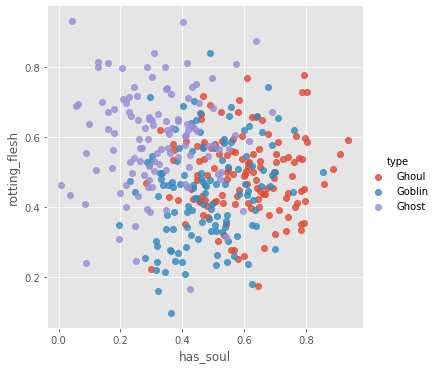

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.lmplot('has_soul','rotting_flesh',data=df,fit_reg=False,hue='type')
plt.savefig('has_soul_rotting_flesh.png')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


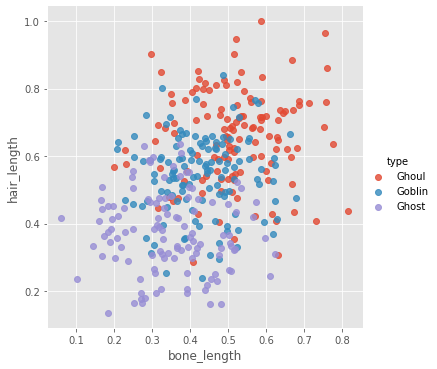

In [357]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.lmplot('bone_length','hair_length',data=df,fit_reg=False,hue='type')
plt.savefig('bone_length_hair_length.png')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


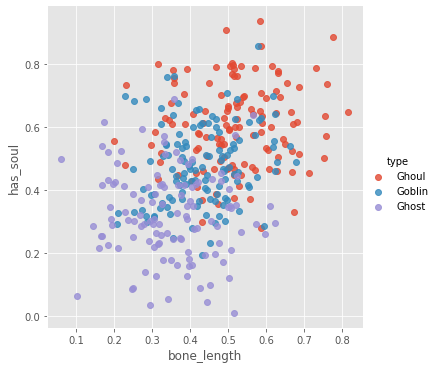

In [358]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.lmplot('bone_length','has_soul',data=df,fit_reg=False,hue='type')
plt.savefig('bone_length_has_soul.png')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


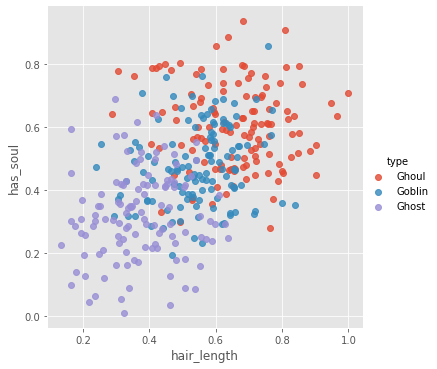

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.lmplot('hair_length','has_soul',data=df,fit_reg=False,hue='type')
plt.savefig('hair_length_has_soul.png')

In [156]:
map_type = {"Ghoul":1, "Goblin":2, "Ghost":0} # change ghoul, goblin, ghost to 1, 2 and 0
df_train.loc[:, "type"] = df_train.type.map(map_type)

In [27]:
df_train

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,1
1,1,0.575560,0.425868,0.531401,0.439899,green,2
2,2,0.467875,0.354330,0.811616,0.791225,black,1
3,4,0.776652,0.508723,0.636766,0.884464,black,1
4,5,0.566117,0.875862,0.418594,0.636438,green,0
...,...,...,...,...,...,...,...
366,886,0.458132,0.391760,0.660590,0.635689,blue,2
367,889,0.331936,0.564836,0.539216,0.551471,green,0
368,890,0.481640,0.501147,0.496446,0.544003,clear,1
369,896,0.294943,0.771286,0.583503,0.300618,clear,0


#  將df_train的color類別資料轉換匯入train_data

In [28]:
train_data = pd.get_dummies(df_train, columns=["color"], prefix=["color"])

In [29]:
train_data

,id,bone_length,rotting_flesh,hair_length,has_soul,type,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0,0.354512,0.350839,0.465761,0.781142,1,0,0,0,1,0,0
1,1,0.575560,0.425868,0.531401,0.439899,2,0,0,0,0,1,0
2,2,0.467875,0.354330,0.811616,0.791225,1,1,0,0,0,0,0
3,4,0.776652,0.508723,0.636766,0.884464,1,1,0,0,0,0,0
4,5,0.566117,0.875862,0.418594,0.636438,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
366,886,0.458132,0.391760,0.660590,0.635689,2,0,0,1,0,0,0
367,889,0.331936,0.564836,0.539216,0.551471,0,0,0,0,0,1,0
368,890,0.481640,0.501147,0.496446,0.544003,1,0,0,0,1,0,0
369,896,0.294943,0.771286,0.583503,0.300618,0,0,0,0,1,0,0


# 將train_data分成測試與訓練資料

In [121]:
from sklearn.model_selection import train_test_split
X = train_data.drop(["type"],axis=1)
y = train_data.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# DecisionTreeClassifier

In [90]:
from sklearn.tree import DecisionTreeClassifier

X=train_data.iloc[:,:-1].values
y=train_data.iloc[:,-1].values
tree = DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=5)

In [133]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)

In [134]:
print('score:',tree.score(X_train,y_train))

score: 0.5990990990990991


In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=1)


tree = tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train,y_train_pred)
tree_test = accuracy_score(y_test,y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'%(tree_train,tree_test))

# %.3f 其中f代表浮點數float而3代表印出到小數點第三位 

Decision tree train/test accuracies 0.599/0.517


In [122]:
X_train

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
203,506,0.517632,0.347566,0.427275,0.625824,0,0,0,0,0,1
92,205,0.378811,0.347287,0.664434,0.504179,0,0,0,1,0,0
69,159,0.227532,0.491082,0.616847,0.480046,1,0,0,0,0,0
345,831,0.712913,0.531892,0.756465,0.453634,0,0,0,1,0,0
96,216,0.341539,0.689139,0.313948,0.055464,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
71,162,0.390769,0.801721,0.205236,0.127877,0,0,0,0,0,1
106,237,0.450759,0.542649,0.795207,0.739429,0,0,0,0,0,1
270,663,0.423953,0.614569,0.584210,0.655330,0,0,0,1,0,0
348,839,0.355313,0.344684,0.555728,0.638232,0,1,0,0,0,0


In [162]:
df_test

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,3,0.471774,0.387937,0.706087,0.698537,black,Ghoul
1,6,0.427332,0.645024,0.565558,0.451462,white,Ghoul
2,9,0.549602,0.491931,0.660387,0.449809,black,Ghoul
3,10,0.638095,0.682867,0.471409,0.356924,white,Ghost
4,13,0.361762,0.583997,0.377256,0.276364,black,Ghost
...,...,...,...,...,...,...,...
524,893,0.377573,0.390158,0.696465,0.355373,blue,Ghoul
525,894,0.229161,0.601265,0.191282,0.475115,clear,Ghost
526,895,0.510497,0.498347,0.708020,0.714154,white,Ghoul
527,898,0.331472,0.765835,0.338207,0.193431,clear,Ghost


# 產生提交資料

In [163]:
NEW=df_test.drop(['bone_length','rotting_flesh','hair_length','has_soul','color'],axis=1)

In [165]:
NEW.to_csv("output1.csv",encoding="utf-8")

# test_data_tree 是df_test轉換完color的資料 

In [286]:
test_data_tree = pd.get_dummies(df_test, columns=["color"], prefix=["color"])

In [293]:
test_data_tree=test_data_tree.drop(['type'],axis=1)

# 使用tree模型預測(test_data_tree)

In [288]:
tree.predict(test_data_tree)

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,

In [296]:
test_data_tree['type']=tree.predict(test_data_tree)

In [297]:
test_data_tree['type']

0      1
1      1
2      1
3      0
4      0
      ..
524    1
525    0
526    1
527    0
528    0
Name: type, Length: 529, dtype: int64

In [298]:
map_type = {1:'Ghoul', 2:"Goblin", 0:"Ghost"} # change ghoul, goblin, ghost to 1, 2 and 0
test_data_tree.loc[:, "type"] = test_data_tree.type.map(map_type)

In [299]:
test_data_tree

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white,type
0,3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0,Ghoul
1,6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1,Ghoul
2,9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0,Ghoul
3,10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1,Ghost
4,13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0,Ghost
...,...,...,...,...,...,...,...,...,...,...,...,...
524,893,0.377573,0.390158,0.696465,0.355373,0,0,1,0,0,0,Ghoul
525,894,0.229161,0.601265,0.191282,0.475115,0,0,0,1,0,0,Ghost
526,895,0.510497,0.498347,0.708020,0.714154,0,0,0,0,0,1,Ghoul
527,898,0.331472,0.765835,0.338207,0.193431,0,0,0,1,0,0,Ghost


In [301]:
submission_tree=test_data_tree.drop(['bone_length','rotting_flesh','hair_length','has_soul','color_black','color_blood','color_blue','color_clear','color_green','color_white'],axis=1)

In [302]:
submission_tree.to_csv("output_tree.csv",encoding="utf-8")

# RandomForestClassifier

In [176]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=25,
                               random_state=1)
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=1)

In [177]:
forest = forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
forest_train = accuracy_score(y_train,y_train_pred)
forest_test = accuracy_score(y_test,y_test_pred)
print('forest train/test accuracies %.3f/%.3f'%(forest_train,forest_test))


forest train/test accuracies 1.000/0.725


# 調整參數

In [379]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=24,
                               random_state=1)
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=24, random_state=1)

In [380]:
forest = forest.fit(X_train,y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
forest_train = accuracy_score(y_train,y_train_pred)
forest_test = accuracy_score(y_test,y_test_pred)
print('forest train/test accuracies %.3f/%.3f'%(forest_train,forest_test))


forest train/test accuracies 1.000/0.732


# 了解特徵重要性

In [382]:
print(forest.feature_importances_)

[0.09890332 0.14812982 0.17601881 0.30912641 0.2122417  0.0093167
 0.00313133 0.00548592 0.01319256 0.00846284 0.01599058]


In [385]:
feat_importances_forest=pd.Series(forest.feature_importances_,index=X.columns)

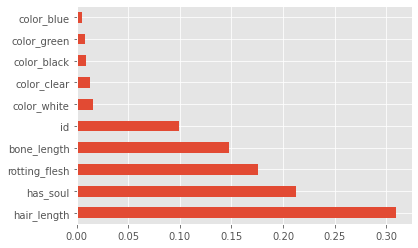

In [386]:
feat_importances_forest.nlargest(10).plot(kind='barh')
plt.show()

# 顏色的欄位重要性都較低，嘗試移除看看模型表現

In [526]:
X_train_withoutcolor=X_train.drop(['color_black','color_blood','color_blue','color_clear','color_green','color_white'],axis=1)
X_test_withoutcolor=X_test.drop(['color_black','color_blood','color_blue','color_clear','color_green','color_white'],axis=1)

In [527]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=490,
                               random_state=1)
forest.fit(X_train_withoutcolor,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=490, random_state=1)

In [528]:
forest = forest.fit(X_train_withoutcolor,y_train)
y_train_pred = forest.predict(X_train_withoutcolor)
y_test_pred = forest.predict(X_test_withoutcolor)
forest_train = accuracy_score(y_train,y_train_pred)
forest_test = accuracy_score(y_test,y_test_pred)
print('forest train/test accuracies %.3f/%.3f'%(forest_train,forest_test))


forest train/test accuracies 1.000/0.738


In [459]:
print(forest.feature_importances_)

[0.08795499 0.14516336 0.16482723 0.36598446 0.23606995]


In [461]:
feat_importances_forest=pd.Series(forest.feature_importances_,index=X_train_withoutcolor.columns)

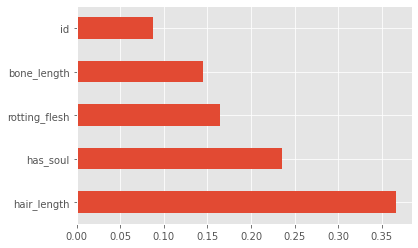

In [462]:
feat_importances_forest.nlargest(10).plot(kind='barh')
plt.show()

# 評估模型
## 計算F1score precision recall 值

In [530]:
#F1-score/precision score(PredictPositiveValue預測為為真且實際為真的比率)/recall(實際為真預測為真的比率)
from sklearn.metrics import f1_score,precision_score,recall_score

f1=f1_score(y_test,y_test_pred,average='macro')
p=precision_score(y_test,y_test_pred,average='macro')
r=recall_score(y_test,y_test_pred,average='macro')
print(f1,p,r)

0.7418479117577311 0.7532487984859095 0.7395915032679738


# 僅移除id看看模型表現

In [463]:
X_train_without_id=X_train.drop(['id'],axis=1)
X_test_without_id=X_test.drop(['id'],axis=1)

In [508]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=1595,
                               random_state=1)
forest.fit(X_train_without_id,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1595, random_state=1)

In [509]:
forest = forest.fit(X_train_without_id,y_train)
y_train_pred = forest.predict(X_train_without_id)
y_test_pred = forest.predict(X_test_without_id)
forest_train = accuracy_score(y_train,y_train_pred)
forest_test = accuracy_score(y_test,y_test_pred)
print('forest train/test accuracies %.3f/%.3f'%(forest_train,forest_test))


forest train/test accuracies 1.000/0.711


### 上方可以看到移除id的結果是0.711比移除color的表現差

# test_data : 尚未移除color時

In [187]:
test_data_FOREST = pd.get_dummies(df_test, columns=["color"], prefix=["color"])

In [190]:
test_data_FOREST=test_data_FOREST.drop(['type'],axis=1)

In [191]:
test_data_FOREST['type']=forest.predict(test_data_FOREST)

In [192]:
test_data_FOREST['type']

0      1
1      2
2      1
3      0
4      0
      ..
524    2
525    0
526    1
527    0
528    0
Name: type, Length: 529, dtype: int64

In [195]:
map_type = {1:'Ghoul', 2:"Goblin", 0:"Ghost"} # change ghoul, goblin, ghost to 1, 2 and 0
test_data_FOREST.loc[:, "type"] = test_data_FOREST.type.map(map_type)

# test_data_FOREST

In [196]:
test_data_FOREST

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white,type
0,3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0,Ghoul
1,6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1,Goblin
2,9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0,Ghoul
3,10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1,Ghost
4,13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0,Ghost
...,...,...,...,...,...,...,...,...,...,...,...,...
524,893,0.377573,0.390158,0.696465,0.355373,0,0,1,0,0,0,Goblin
525,894,0.229161,0.601265,0.191282,0.475115,0,0,0,1,0,0,Ghost
526,895,0.510497,0.498347,0.708020,0.714154,0,0,0,0,0,1,Ghoul
527,898,0.331472,0.765835,0.338207,0.193431,0,0,0,1,0,0,Ghost


# submission

In [197]:
df_test_new0=test_data_FOREST['type']


In [198]:
df_test_new0

0       Ghoul
1      Goblin
2       Ghoul
3       Ghost
4       Ghost
        ...  
524    Goblin
525     Ghost
526     Ghoul
527     Ghost
528     Ghost
Name: type, Length: 529, dtype: object

In [215]:
test_data_FOREST

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white,type
0,3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0,Ghoul
1,6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1,Goblin
2,9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0,Ghoul
3,10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1,Ghost
4,13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0,Ghost
...,...,...,...,...,...,...,...,...,...,...,...,...
524,893,0.377573,0.390158,0.696465,0.355373,0,0,1,0,0,0,Goblin
525,894,0.229161,0.601265,0.191282,0.475115,0,0,0,1,0,0,Ghost
526,895,0.510497,0.498347,0.708020,0.714154,0,0,0,0,0,1,Ghoul
527,898,0.331472,0.765835,0.338207,0.193431,0,0,0,1,0,0,Ghost


In [216]:
test_data_FOREST.drop(['bone_length','rotting_flesh','hair_length','has_soul','color_black','color_blood','color_blue','color_clear','color_green','color_white'],axis=1)

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Ghost
4,13,Ghost
...,...,...
524,893,Goblin
525,894,Ghost
526,895,Ghoul
527,898,Ghost


In [217]:
submission_FOREST=test_data_FOREST.drop(['bone_length','rotting_flesh','hair_length','has_soul','color_black','color_blood','color_blue','color_clear','color_green','color_white'],axis=1)

In [218]:
submission_FOREST.to_csv("output_FOREST.csv",encoding="utf-8")

# 移除color欄位後的模型預測（用test資料匯入)

In [513]:
test_data_FOREST = pd.get_dummies(df_test, columns=['color'], prefix=["color"])

In [517]:
test_data_FOREST=test_data_FOREST.drop(['color_black','color_blood','color_blue','color_clear','color_green','color_white'],axis=1)

In [518]:
test_data_FOREST['type']=forest.predict(test_data_FOREST)

In [519]:
test_data_FOREST['type']

0      1
1      2
2      1
3      0
4      0
      ..
524    2
525    0
526    1
527    0
528    0
Name: type, Length: 529, dtype: int64

In [520]:
map_type = {1:'Ghoul', 2:"Goblin", 0:"Ghost"} # change ghoul, goblin, ghost to 1, 2 and 0
test_data_FOREST.loc[:, "type"] = test_data_FOREST.type.map(map_type)

In [521]:
test_data_FOREST

,id,bone_length,rotting_flesh,hair_length,has_soul,type
0,3,0.471774,0.387937,0.706087,0.698537,Ghoul
1,6,0.427332,0.645024,0.565558,0.451462,Goblin
2,9,0.549602,0.491931,0.660387,0.449809,Ghoul
3,10,0.638095,0.682867,0.471409,0.356924,Ghost
4,13,0.361762,0.583997,0.377256,0.276364,Ghost
...,...,...,...,...,...,...
524,893,0.377573,0.390158,0.696465,0.355373,Goblin
525,894,0.229161,0.601265,0.191282,0.475115,Ghost
526,895,0.510497,0.498347,0.708020,0.714154,Ghoul
527,898,0.331472,0.765835,0.338207,0.193431,Ghost


In [522]:
test_data_FOREST.drop(['bone_length','rotting_flesh','hair_length','has_soul'],axis=1)

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Ghost
4,13,Ghost
...,...,...
524,893,Goblin
525,894,Ghost
526,895,Ghoul
527,898,Ghost


In [523]:
submission_FOREST.to_csv("output_FOREST_2.0.csv",encoding="utf-8")

# AdaBoostClassifier

In [219]:
from sklearn.model_selection import train_test_split
X = train_data.drop(["type"],axis=1)
y = train_data.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [360]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=tree,
                        n_estimators=500,
                        learning_rate=0.1,
                        random_state=1)
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=500, random_state=1)

In [361]:
ada = ada.fit(X_train,y_train)
y_train_pred_ada = ada.predict(X_train)
y_test_pred_ada = ada.predict(X_test)
ada_train = accuracy_score(y_train,y_train_pred_ada)
ada_test = accuracy_score(y_test,y_test_pred_ada)
print('ada train/test accuracies %.3f/%.3f'%(ada_train,ada_test))


ada train/test accuracies 0.779/0.705


In [366]:
print(ada.feature_importances_)

[0.02  0.14  0.216 0.332 0.292 0.    0.    0.    0.    0.    0.   ]


In [368]:
feat_importances=pd.Series(ada.feature_importances_,index=X.columns)

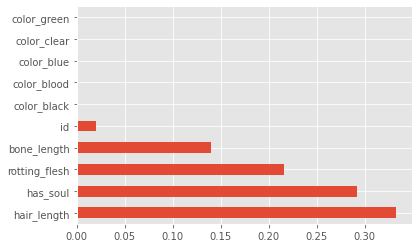

In [370]:
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [229]:
df_test=df_test.drop(['type'],axis=1)

In [230]:
test_data_ada = pd.get_dummies(df_test, columns=["color"], prefix=["color"])

In [231]:
test_data_ada

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0
1,6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1
2,9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0
3,10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1
4,13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
524,893,0.377573,0.390158,0.696465,0.355373,0,0,1,0,0,0
525,894,0.229161,0.601265,0.191282,0.475115,0,0,0,1,0,0
526,895,0.510497,0.498347,0.708020,0.714154,0,0,0,0,0,1
527,898,0.331472,0.765835,0.338207,0.193431,0,0,0,1,0,0


In [232]:
test_data_ada['type']=ada.predict(test_data_ada)

In [234]:
map_type = {1:'Ghoul', 2:"Goblin", 0:"Ghost"} # change ghoul, goblin, ghost to 1, 2 and 0
test_data_ada.loc[:, "type"] = test_data_ada.type.map(map_type)

In [235]:
test_data_ada

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white,type
0,3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0,Ghoul
1,6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1,Goblin
2,9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0,Ghoul
3,10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1,Goblin
4,13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0,Ghost
...,...,...,...,...,...,...,...,...,...,...,...,...
524,893,0.377573,0.390158,0.696465,0.355373,0,0,1,0,0,0,Goblin
525,894,0.229161,0.601265,0.191282,0.475115,0,0,0,1,0,0,Ghost
526,895,0.510497,0.498347,0.708020,0.714154,0,0,0,0,0,1,Ghoul
527,898,0.331472,0.765835,0.338207,0.193431,0,0,0,1,0,0,Ghost


In [236]:
test_data_ada.drop(['bone_length','rotting_flesh','hair_length','has_soul','color_black','color_blood','color_blue','color_clear','color_green','color_white'],axis=1)

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Goblin
4,13,Ghost
...,...,...
524,893,Goblin
525,894,Ghost
526,895,Ghoul
527,898,Ghost


In [237]:
submission_ada=test_data_ada.drop(['bone_length','rotting_flesh','hair_length','has_soul','color_black','color_blood','color_blue','color_clear','color_green','color_white'],axis=1)

In [238]:
submission_ada

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Goblin
4,13,Ghost
...,...,...
524,893,Goblin
525,894,Ghost
526,895,Ghoul
527,898,Ghost


In [239]:
submission_ada.to_csv("output_ada.csv",encoding="utf-8")

# XGBOOST

In [240]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [243]:
xgbc = xgbc.fit(X_train,y_train)
y_train_pred = xgbc.predict(X_train)
y_test_pred = xgbc.predict(X_test)
xgbc_train = accuracy_score(y_train,y_train_pred)
xgbc_test = accuracy_score(y_test,y_test_pred)
print('xgbc train/test accuracies %.3f/%.3f'%(xgbc_train,xgbc_test))


xgbc train/test accuracies 1.000/0.705


In [246]:
test_data_xgbc = pd.get_dummies(df_test, columns=["color"], prefix=["color"])

In [247]:
test_data_xgbc

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0
1,6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1
2,9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0
3,10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1
4,13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
524,893,0.377573,0.390158,0.696465,0.355373,0,0,1,0,0,0
525,894,0.229161,0.601265,0.191282,0.475115,0,0,0,1,0,0
526,895,0.510497,0.498347,0.708020,0.714154,0,0,0,0,0,1
527,898,0.331472,0.765835,0.338207,0.193431,0,0,0,1,0,0


In [249]:
test_data_xgbc['type']=xgbc.predict(test_data_xgbc)

In [255]:
submission_XBGC=test_data_xgbc.drop(['bone_length','rotting_flesh','hair_length','has_soul','color_black','color_blood','color_blue','color_clear','color_green','color_white'],axis=1)

In [252]:
map_type = {1:'Ghoul', 2:"Goblin", 0:"Ghost"} # change ghoul, goblin, ghost to 1, 2 and 0
test_data_xgbc.loc[:, "type"] = test_data_xgbc.type.map(map_type)

In [253]:
test_data_xgbc

,id,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white,type
0,3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0,Ghoul
1,6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1,Goblin
2,9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0,Ghoul
3,10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1,Ghost
4,13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0,Ghost
...,...,...,...,...,...,...,...,...,...,...,...,...
524,893,0.377573,0.390158,0.696465,0.355373,0,0,1,0,0,0,Ghoul
525,894,0.229161,0.601265,0.191282,0.475115,0,0,0,1,0,0,Ghost
526,895,0.510497,0.498347,0.708020,0.714154,0,0,0,0,0,1,Ghoul
527,898,0.331472,0.765835,0.338207,0.193431,0,0,0,1,0,0,Ghost


In [256]:
submission_XBGC

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Ghost
4,13,Ghost
...,...,...
524,893,Ghoul
525,894,Ghost
526,895,Ghoul
527,898,Ghost


In [257]:
submission_XBGC.to_csv("output_XGBC.csv",encoding="utf-8")